Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Inladen van modules en df:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('US_Accidents_March23.csv')

In [3]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Year"]=df["Start_Time"].dt.year
df = df[df['Year'].isin([2020, 2021, 2022])]

In [4]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4505118 entries, 512217 to 7246341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
512217,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.00,...,False,False,False,True,False,Night,Night,Day,Day,2022
512218,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.00,...,False,False,False,False,False,Night,Night,Night,Night,2022
512219,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.00,...,False,False,False,True,False,Night,Night,Night,Night,2022
512220,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.00,...,False,False,False,False,False,Night,Night,Day,Day,2022
512221,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.91,...,False,False,False,False,False,Night,Day,Day,Day,2022


Algemene explorative data

In [5]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

Basisstatistieken voor numerieke kolommen:
           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  4.505118e+06  4.505118e+06  4.505118e+06  3.348607e+06  3.348607e+06   
mean   2.123295e+00  3.598281e+01 -9.407716e+01  3.594539e+01 -9.467895e+01   
std    4.292845e-01  5.177597e+00  1.743023e+01  5.312601e+00  1.789180e+01   
min    1.000000e+00  2.455480e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.302757e+01 -1.171372e+02  3.293534e+01 -1.174095e+02   
50%    2.000000e+00  3.578283e+01 -8.668504e+01  3.587789e+01 -8.670342e+01   
75%    2.000000e+00  3.996290e+01 -8.021666e+01  3.996981e+01 -8.017321e+01   
max    4.000000e+00  4.900050e+01 -6.748413e+01  4.900222e+01 -6.748413e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  4.505118e+06    4.403414e+06   4.368280e+06  4.396807e+06   
mean   7.249653e-01    6.195910e+01   6.074021e+01  6.424843e+01   
std    1.870308e+00    1.906787e+01   2.1

df schoonmaken 

In [6]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

specifieke slechte data aantekeningen

In [7]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

In [8]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

"End_Lat" heeft 1156511 missende waardes
"End_Lng" heeft 1156511 missende waardes
"Description" heeft 4 missende waardes
"Street" heeft 10093 missende waardes
"City" heeft 168 missende waardes
"Zipcode" heeft 1041 missende waardes
"Timezone" heeft 4481 missende waardes
"Airport_Code" heeft 16200 missende waardes
"Weather_Timestamp" heeft 78304 missende waardes
"Temperature(F)" heeft 101704 missende waardes
"Wind_Chill(F)" heeft 136838 missende waardes
"Humidity(%)" heeft 108311 missende waardes
"Pressure(in)" heeft 86960 missende waardes
"Visibility(mi)" heeft 104619 missende waardes
"Wind_Direction" heeft 122427 missende waardes
"Wind_Speed(mph)" heeft 122384 missende waardes
"Precipitation(in)" heeft 192483 missende waardes
"Weather_Condition" heeft 100975 missende waardes
"Sunrise_Sunset" heeft 21464 missende waardes
"Civil_Twilight" heeft 21464 missende waardes
"Nautical_Twilight" heeft 21464 missende waardes
"Astronomical_Twilight" heeft 21464 missende waardes


Data op landelijke schaal (Bart)

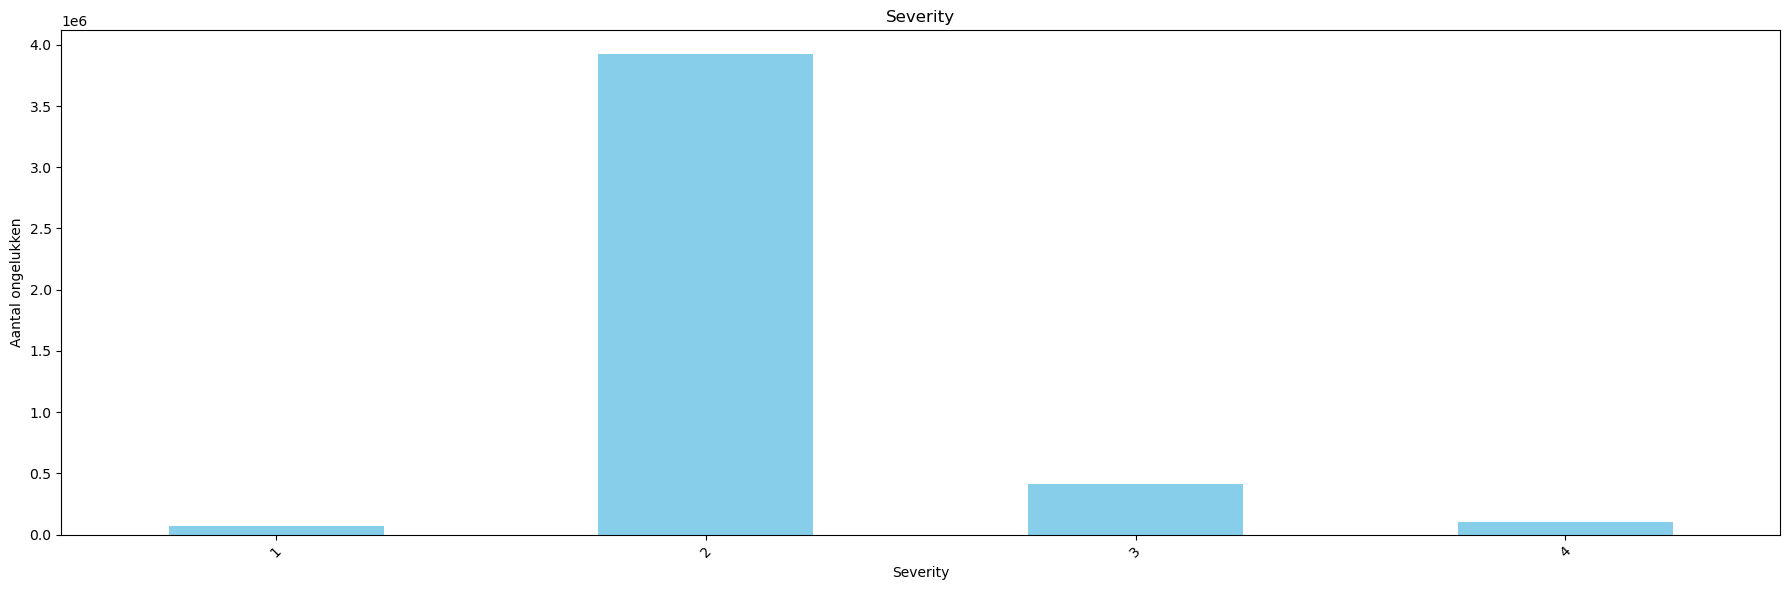

In [9]:
state_accident_counts = df['Severity'].value_counts()
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [10]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

Basisstatistieken voor numerieke kolommen:
           Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  4.505118e+06  4.505118e+06  4.505118e+06  3.348607e+06  3.348607e+06   
mean   2.123295e+00  3.598281e+01 -9.407716e+01  3.594539e+01 -9.467895e+01   
std    4.292845e-01  5.177597e+00  1.743023e+01  5.312601e+00  1.789180e+01   
min    1.000000e+00  2.455480e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.302757e+01 -1.171372e+02  3.293534e+01 -1.174095e+02   
50%    2.000000e+00  3.578283e+01 -8.668504e+01  3.587789e+01 -8.670342e+01   
75%    2.000000e+00  3.996290e+01 -8.021666e+01  3.996981e+01 -8.017321e+01   
max    4.000000e+00  4.900050e+01 -6.748413e+01  4.900222e+01 -6.748413e+01   

       Distance(mi)  Temperature(F)  Wind_Chill(F)   Humidity(%)  \
count  4.505118e+06    4.403414e+06   4.368280e+06  4.396807e+06   
mean   7.249653e-01    6.195910e+01   6.074021e+01  6.424843e+01   
std    1.870308e+00    1.906787e+01   2.1

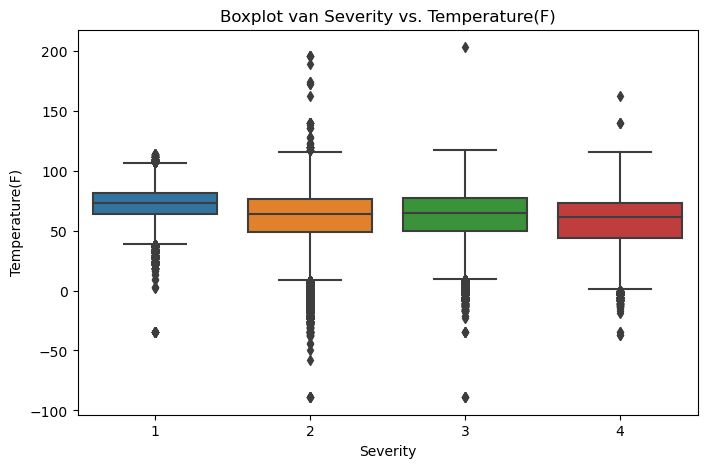

In [11]:
# Boxplot van 'Severity' vs. 'Temperature(F)'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title('Boxplot van Severity vs. Temperature(F)')
plt.xlabel('Severity')
plt.ylabel('Temperature(F)')
plt.show()

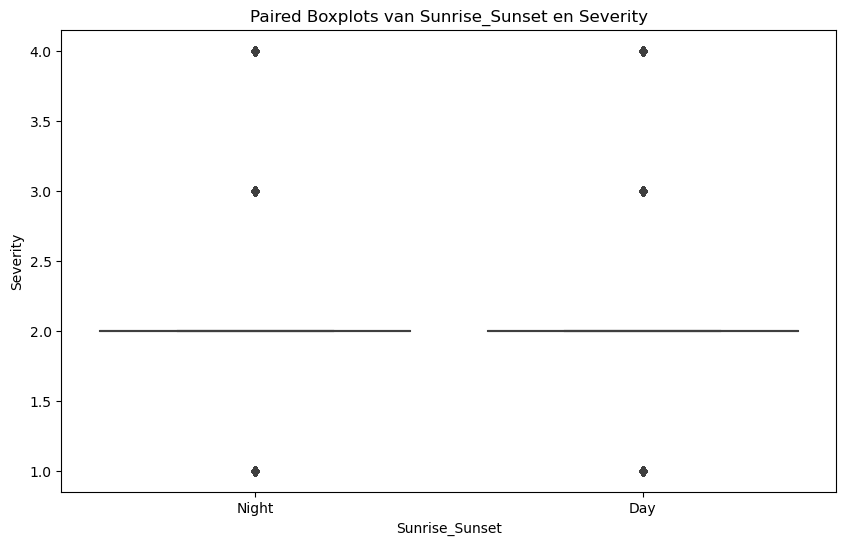

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sunrise_Sunset', y='Severity', data=df)
plt.title('Paired Boxplots van Sunrise_Sunset en Severity')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Severity')
plt.show()

In [13]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

KeyError: 'Side'

Quint 


In [ ]:
df_places = df[['Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]

In [ ]:
df_places['Place_accident'] = df_places.apply(lambda row: ','.join([col for col in df_places.columns if row[col]]), axis=1)


/var/folders/6b/rhfs1dgj5jv3bq1s3qxjzx280000gn/T/ipykernel_66042/4072891996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_places['Place_accident'] = df_places.apply(lambda row: ','.join([col for col in df_places.columns if row[col]]), axis=1)


In [ ]:
df_places.head(10)

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Place_accident
0,False,False,False,False,False,False,False,False,False,False,False,False,
1,False,False,False,False,False,False,False,False,False,False,False,False,
2,False,False,False,False,False,False,False,False,False,False,True,False,Traffic_Signal
3,False,False,False,False,False,False,False,False,False,False,False,False,
4,False,False,False,False,False,False,False,False,False,False,True,False,Traffic_Signal
5,False,False,False,False,False,False,False,False,False,False,False,False,
6,False,False,False,False,False,False,False,False,False,False,False,False,
7,False,False,False,False,False,False,False,False,False,False,False,False,
8,False,False,False,False,False,False,False,False,False,False,False,False,
9,False,False,False,False,False,False,False,False,False,False,False,False,


In [ ]:
# Drivers per state, kaggle Data set

df_drivers_by_state = pd.read_csv('Licensed_drivers_By_State.csv')
print(df_drivers_by_state)


       Year  Gender    Cohort       State  Drivers
0      2017    Male  Under 16     Alabama      0.0
1      2017    Male  Under 16      Alaska      0.0
2      2017    Male  Under 16     Arizona      0.0
3      2017    Male  Under 16    Arkansas      0.0
4      2017    Male  Under 16  California      0.0
...     ...     ...       ...         ...      ...
57829  2018  Female     65-69     Wyoming  16061.0
57830  2018  Female     70-74     Wyoming  11804.0
57831  2018  Female     75-79     Wyoming   7770.0
57832  2018  Female     80-84     Wyoming   4715.0
57833  2018  Female       85+     Wyoming   3456.0

[57834 rows x 5 columns]


In [ ]:
# Calculate sum per state


sum_per_state = df_drivers_by_state.groupby('State')['Drivers'].sum()
sum_per_state_sorted = sum_per_state.sort_values(ascending=False)
print(sum_per_state_sorted)

#Test123

State
California              576317897.0
Texas                   362911317.0
Florida                 332206242.0
New York                278903109.0
Pennsylvania            214285552.0
Illinois                202089002.0
Ohio                    197074002.0
Michigan                174597232.0
North Carolina          155971968.0
Georgia                 150907550.0
New Jersey              146079208.0
Virginia                131059091.0
Washington              118755159.0
Massachusetts           116153834.0
Indiana                 112910836.0
Tennessee               110096934.0
Missouri                101008854.0
Arizona                 100843536.0
Wisconsin                98554261.0
Maryland                 91949382.0
Alabama                  91094599.0
Colorado                 85660123.0
South Carolina           78281683.0
Minnesota                77805906.0
Louisiana                75567250.0
Kentucky                 70926827.0
Oregon                   67021988.0
Connecticut           

In [ ]:
sum_per_state_sorted.columns =['State', 'Licensed_Drivers']
print(sum_per_state_sorted)

State
California              576317897.0
Texas                   362911317.0
Florida                 332206242.0
New York                278903109.0
Pennsylvania            214285552.0
Illinois                202089002.0
Ohio                    197074002.0
Michigan                174597232.0
North Carolina          155971968.0
Georgia                 150907550.0
New Jersey              146079208.0
Virginia                131059091.0
Washington              118755159.0
Massachusetts           116153834.0
Indiana                 112910836.0
Tennessee               110096934.0
Missouri                101008854.0
Arizona                 100843536.0
Wisconsin                98554261.0
Maryland                 91949382.0
Alabama                  91094599.0
Colorado                 85660123.0
South Carolina           78281683.0
Minnesota                77805906.0
Louisiana                75567250.0
Kentucky                 70926827.0
Oregon                   67021988.0
Connecticut           

In [ ]:
df_main = df.merge(sum_per_state_sorted, on='State', how='left')
df_main.head()


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Drivers
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,NaN
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,NaN
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,NaN
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,NaN
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,NaN


Data op individuele staten (Quint & Doena)

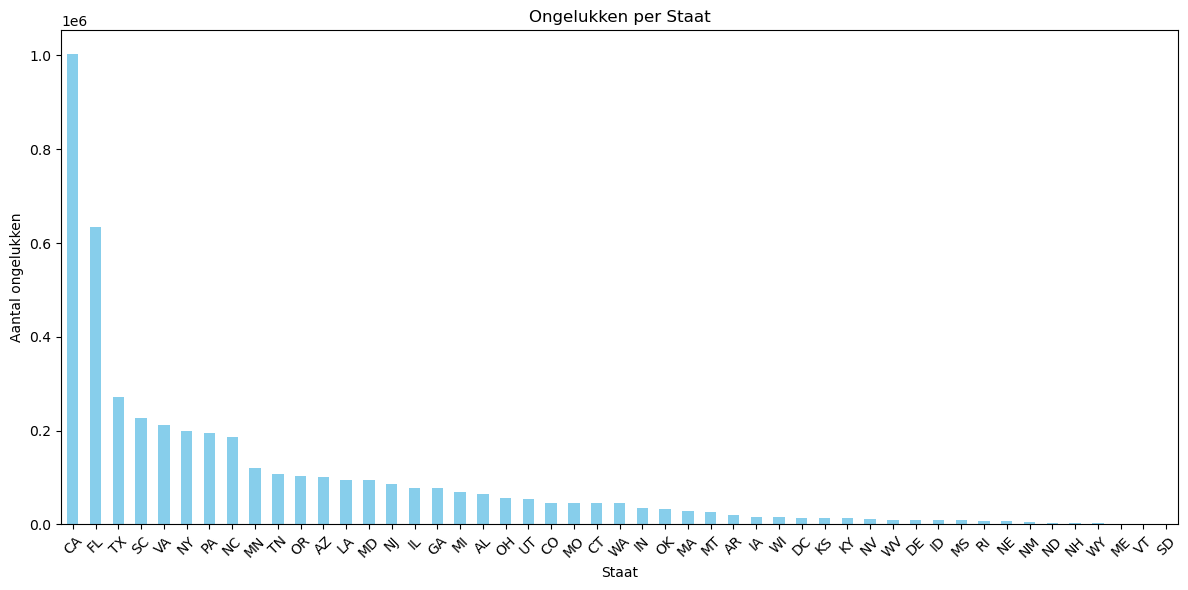

In [14]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


Doena: 

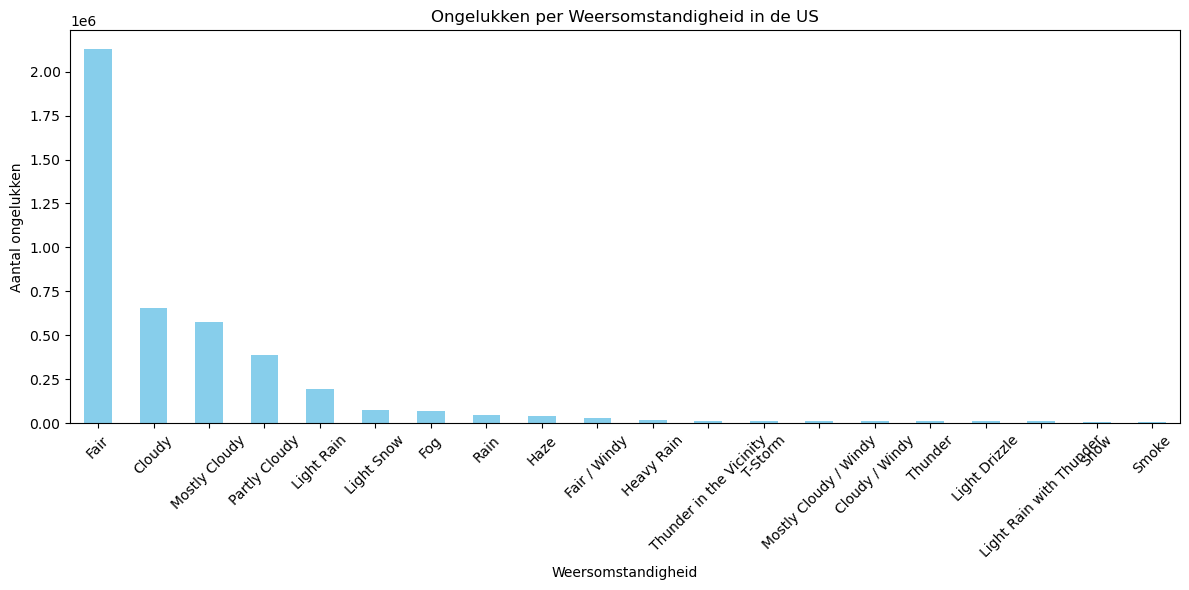

In [15]:
# Aantal ongelukken per weersomstandigheid in de US
weather_accident_counts = df['Weather_Condition'].value_counts().head(20)

plt.figure(figsize=(12, 6))
weather_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Weersomstandigheid in de US')
plt.xlabel('Weersomstandigheid')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


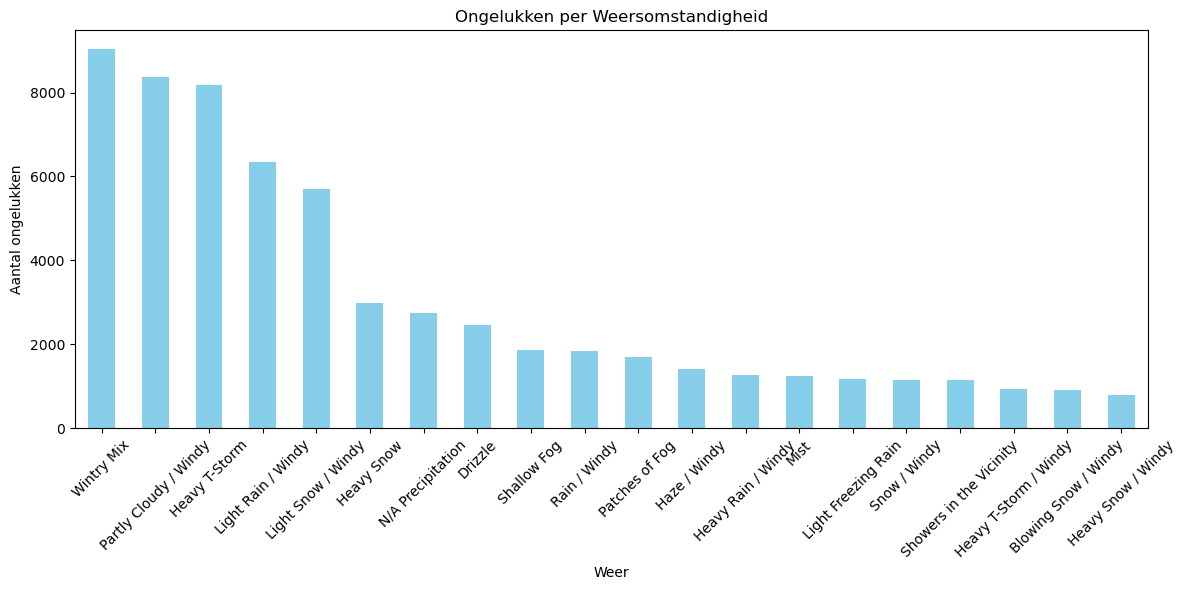

In [16]:
# Aantal ongelukken per weersomstandigheid zonder de eerste 20

US_accident_counts = df['Weather_Condition'].value_counts()

ignore_biggest_values = US_accident_counts[20:].head(20)

plt.figure(figsize=(12, 6))
ignore_biggest_values.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Weersomstandigheid')
plt.xlabel('Weer')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [17]:
# drop na values in the weather conditions column
df_weather = df.dropna(subset=['Weather_Condition'])

In [18]:
df_weather['Weather_Condition'].unique()

array(['Fair', 'Mostly Cloudy', 'Partly Cloudy', 'Cloudy', 'Fog', 'Haze',
       'Light Rain', 'Thunder in the Vicinity', 'Rain', 'Heavy Rain',
       'Heavy Rain / Windy', 'Fair / Windy', 'Light Rain with Thunder',
       'Smoke', 'Thunder', 'Shallow Fog', 'Patches of Fog',
       'Light Drizzle', 'Showers in the Vicinity', 'T-Storm',
       'Thunder / Windy', 'Heavy T-Storm / Windy', 'Heavy T-Storm',
       'Drizzle', 'Light Rain / Windy', 'Mist', 'Mostly Cloudy / Windy',
       'N/A Precipitation', 'Light Rain Shower', 'Partly Cloudy / Windy',
       'Cloudy / Windy', 'Drizzle and Fog', 'T-Storm / Windy',
       'Rain / Windy', 'Blowing Dust', 'Heavy Drizzle', 'Smoke / Windy',
       'Haze / Windy', 'Tornado', 'Light Snow', 'Snow',
       'Light Drizzle / Windy', 'Blowing Dust / Windy',
       'Widespread Dust / Windy', 'Wintry Mix', 'Light Snow / Windy',
       'Wintry Mix / Windy', 'Light Snow with Thunder', 'Fog / Windy',
       'Snow and Thunder', 'Heavy Snow', 'Light Snow Showe

In [19]:
# Get all the unique values that contain the string 'Rain'
rainy_weather = df_weather[df_weather['Weather_Condition'].str.contains('cloud', case=False)]
rainy_weather["Weather_Condition"].unique()

array(['Mostly Cloudy', 'Partly Cloudy', 'Cloudy',
       'Mostly Cloudy / Windy', 'Partly Cloudy / Windy', 'Cloudy / Windy',
       'Funnel Cloud'], dtype=object)

In [20]:
# Create a function that puts a weather condition into a new category such as 'Sunny'

condition_mapping = {
    'Tornado': ['tornado'],
    'Thunder': ['thunder'],
    'Sand storm': ['sand', 'sandy'],
    'Freeze and rain' : ['Light Freezing Rain / Windy'],
    'Freeze': ['freeze', 'freezing'],
    'Misty' : ['misty', 'mist', 'fog', 'foggy'],
    'Hail': ['hail'],
    'Snow': ['snow', 'snowy'],
    'Stormy': ['storm', 'stormy', 'rain / windy', 'Light Rain Shower / Windy'],
    'Windy' : ['wind'],
    'Heavy Rain' : ['heavy rain'],
    'Rain': ['rain', 'shower', 'drizzle', 'light rain'],
    'Cloudy': ['cloudy', 'overcast', 'clouds'],
    'Sunny': ['sunny', 'clear', 'fair'],

     }

def categorize_weather(description):
    for condition, keywords in condition_mapping.items():
        for keyword in keywords:
            if keyword in str(description).lower():
                return condition
    return 'Other'

print(categorize_weather('fog'))

Misty


In [21]:
# create new column 'Weather_Condition_Useful' with new weather categories
df_weather['Weather_Condition_Useful'] = df_weather['Weather_Condition'].apply(categorize_weather)
df_weather.head()

/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_759/4161626514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['Weather_Condition_Useful'] = df_weather['Weather_Condition'].apply(categorize_weather)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Weather_Condition_Useful
512217,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.00,...,False,False,True,False,Night,Night,Day,Day,2022,Sunny
512218,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.00,...,False,False,False,False,Night,Night,Night,Night,2022,Sunny
512219,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.00,...,False,False,True,False,Night,Night,Night,Night,2022,Cloudy
512220,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.00,...,False,False,False,False,Night,Night,Day,Day,2022,Cloudy
512221,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.91,...,False,False,False,False,Night,Day,Day,Day,2022,Cloudy


In [22]:
df_weather['Weather_Condition_Useful'].head(10)

512217     Sunny
512218     Sunny
512219    Cloudy
512220    Cloudy
512221    Cloudy
512222    Cloudy
512223     Sunny
512224     Sunny
512225    Cloudy
512226     Sunny
Name: Weather_Condition_Useful, dtype: object

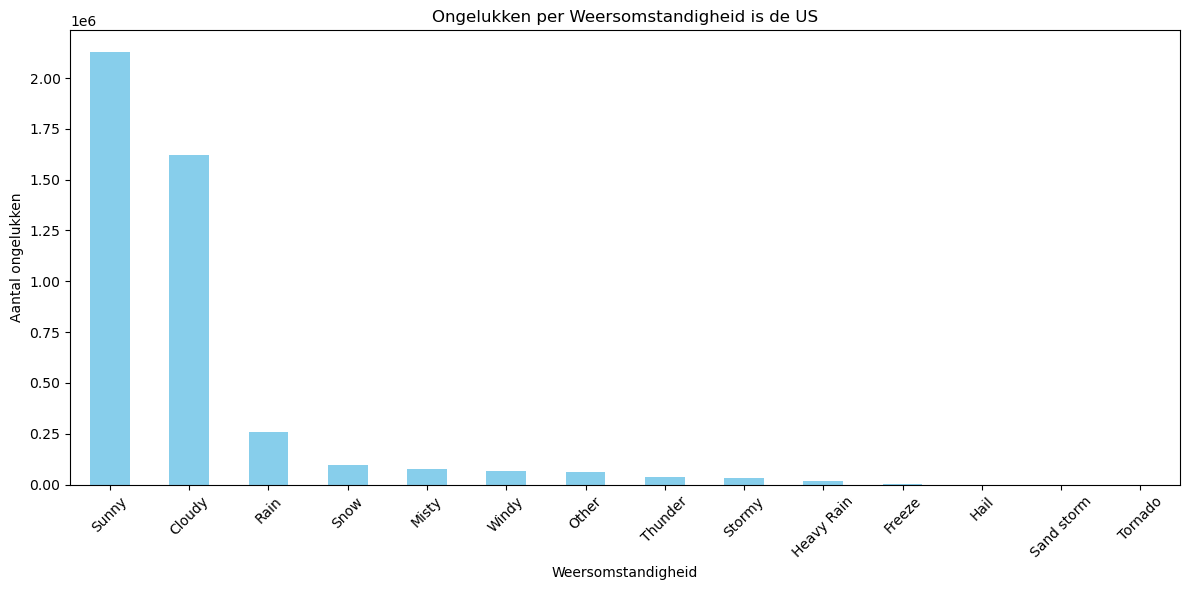

In [23]:
# Aantal ongelukken per weersomstandigheid in de US
US_accident_counts = df_weather['Weather_Condition_Useful'].value_counts()

plt.figure(figsize=(12, 6))
US_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Weersomstandigheid is de US')
plt.xlabel('Weersomstandigheid')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

We will now look at the weather conditions per state. We wil plot the weather condition vs the number of accidents per day in that state. We will first look at the states California, Texas and Florida. 

In [24]:
# Change the data types of the column 'Start_Time' to 'datetime' datatype 
df_weather["Start_Time"] = pd.to_datetime(df_weather['Start_Time'])

/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_759/3411059871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather["Start_Time"] = pd.to_datetime(df_weather['Start_Time'])


In [25]:
# Check
df_weather["Start_Time"].dt.date.head()

512217    2022-09-08
512218    2022-09-08
512219    2022-09-08
512220    2022-09-08
512221    2022-09-08
Name: Start_Time, dtype: object

In [26]:
# We create a new data frame where state = 'CA'
df_weather_california = df_weather[df_weather["State"] == 'CA']

In [27]:
# Create new column
df_weather_california["Day"] = df_weather_california["Start_Time"].dt.date


/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_759/3677263855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_california["Day"] = df_weather_california["Start_Time"].dt.date


In [28]:
# count the number of days per weather condition
acdnts_per_weather = df_weather_california["Weather_Condition_Useful"].value_counts()
print(acdnts_per_weather)


Sunny         631701
Cloudy        233309
Rain           36568
Other          35295
Misty          20660
Windy          12569
Heavy Rain      3135
Snow            2672
Stormy          1956
Thunder          618
Hail               4
Freeze             3
Sand storm         2
Name: Weather_Condition_Useful, dtype: int64


In [29]:
# create new column 'day' and 'month'
df_weather["Day"] = df_weather["Start_Time"].dt.date
df_weather["Month"] = df_weather["Start_Time"].dt.month

/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_759/3314341871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather["Day"] = df_weather["Start_Time"].dt.date
/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_759/3314341871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather["Month"] = df_weather["Start_Time"].dt.month


In [30]:
df_weather_california['Month'] = df_weather["Start_Time"].dt.month

/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_759/4088793875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_california['Month'] = df_weather["Start_Time"].dt.month


In [31]:
# create a dataframe where year = 2021
year = 2021
df_weather_california_2021 = df_weather_california[df_weather_california['Year'] == year].sort_values(by='Month')

In [32]:
# df of number accidents per month 
acdnts_per_month = df_weather_california_2021['Month'].value_counts().sort_index()
acdnts_per_month


1     37173
2     34123
3     19868
4     19093
5     20492
6     28274
7     25224
8     25555
9     28572
10    28708
11    29829
12    36986
Name: Month, dtype: int64

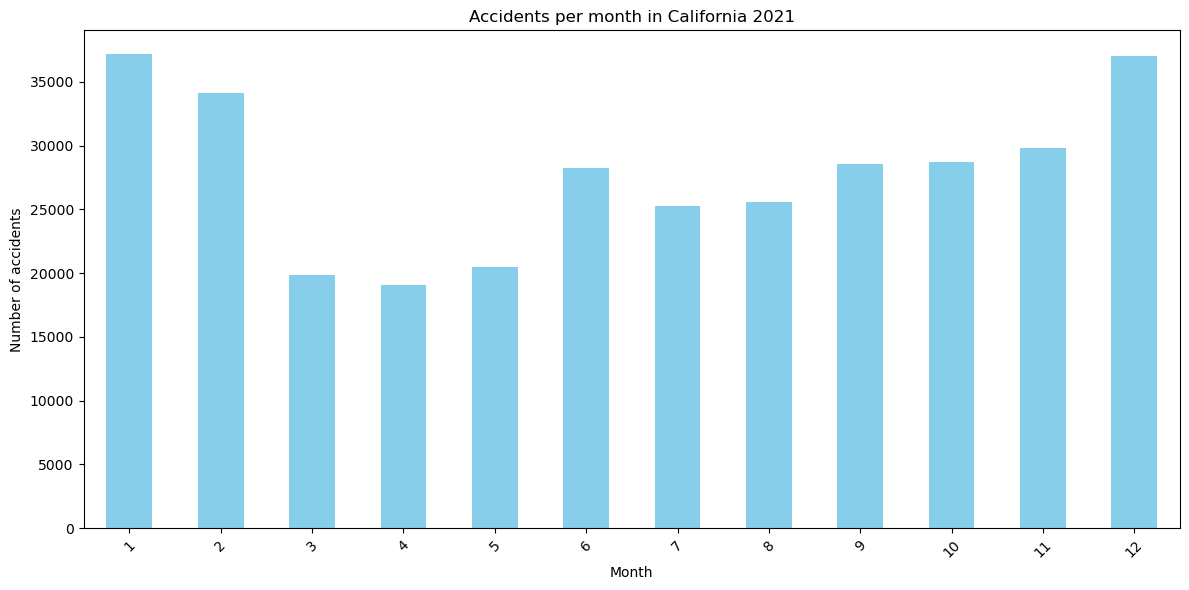

In [33]:
plt.figure(figsize=(12, 6))
acdnts_per_month.plot(kind='bar', color='skyblue')
plt.title('Accidents per month in California 2021')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

We see most accidents occur in Jan, Feb and March. Let's look at the weather in those three months

In [34]:
df_weather_california_2021_jan = df_weather_california_2021[df_weather_california_2021['Month'] == 1]
weather_jan = df_weather_california_2021_jan['Weather_Condition_Useful'].value_counts()

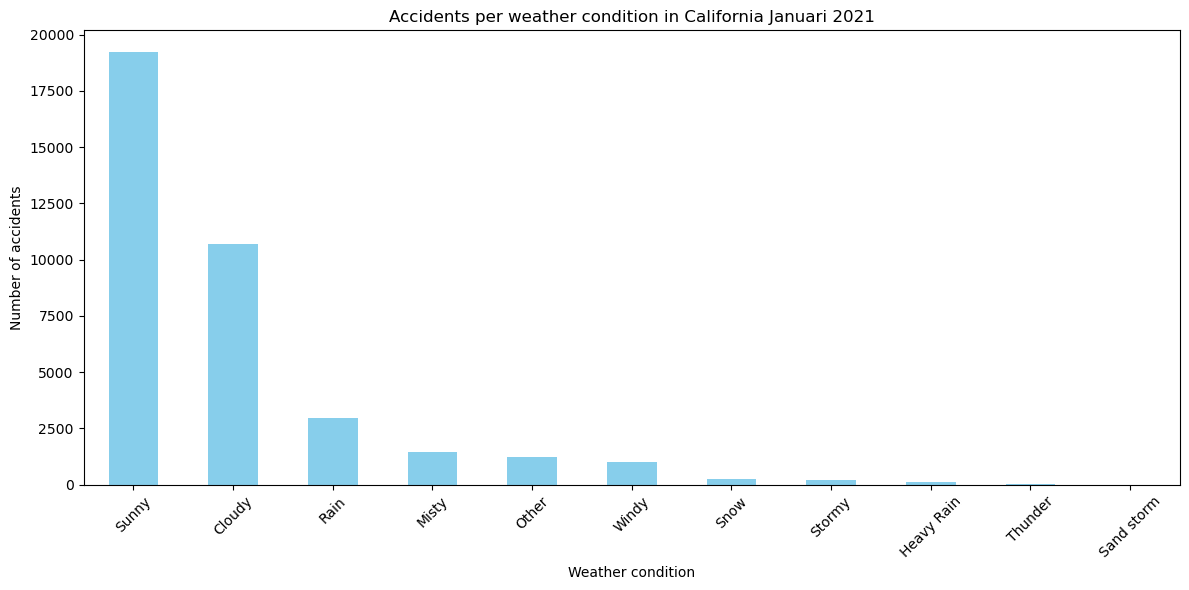

In [36]:
plt.figure(figsize=(12, 6))
weather_jan.plot(kind='bar', color='skyblue')
plt.title('Accidents per weather condition in California Januari 2021')
plt.xlabel('Weather condition')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Nu het aantal ongelukken per maand in California voor het jaar 2022.

In [37]:
# create a dataframe where year = 2022
year = 2022
df_weather_california_2022 = df_weather_california[df_weather_california['Year'] == year]

In [38]:
# df of number accidents per month 
acdnts_per_month = df_weather_california_2022['Month'].value_counts().sort_index()
acdnts_per_month

1     24576
2     33374
3     29543
4     43282
5     31711
6     27083
7     29294
8     33364
9     30139
10    17507
11    28824
12    38457
Name: Month, dtype: int64

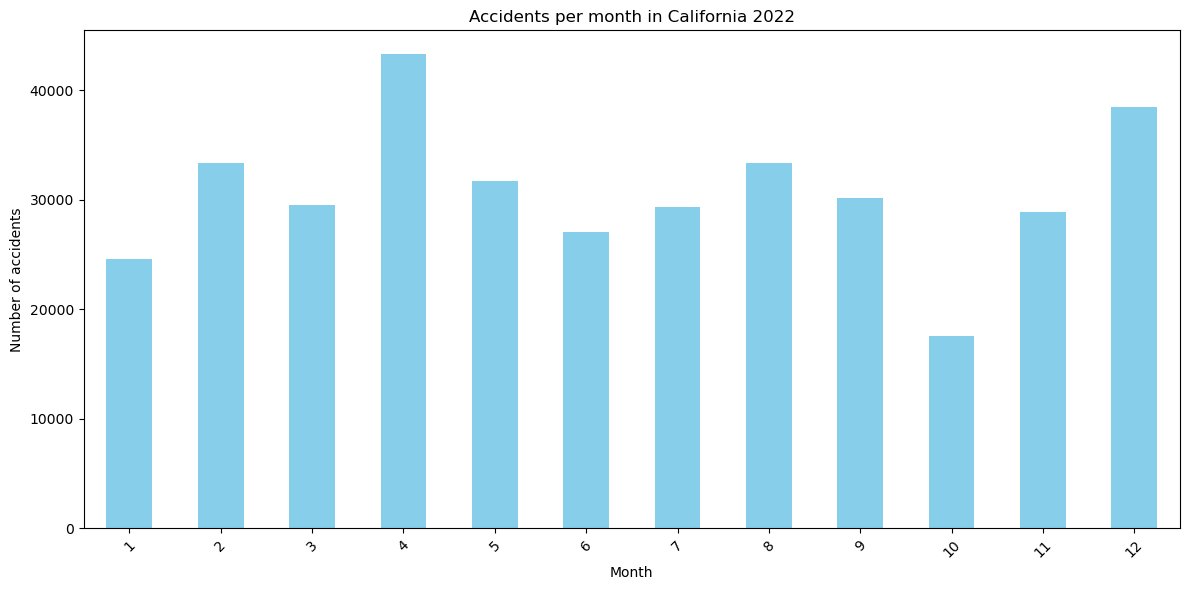

In [39]:
plt.figure(figsize=(12, 6))
acdnts_per_month.plot(kind='bar', color='skyblue')
plt.title('Accidents per month in California 2022')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [40]:
df_weather_california_2022_ap = df_weather_california_2022[df_weather_california_2022['Month'] == 4]
weather_ap = df_weather_california_2022_ap['Weather_Condition_Useful'].value_counts()

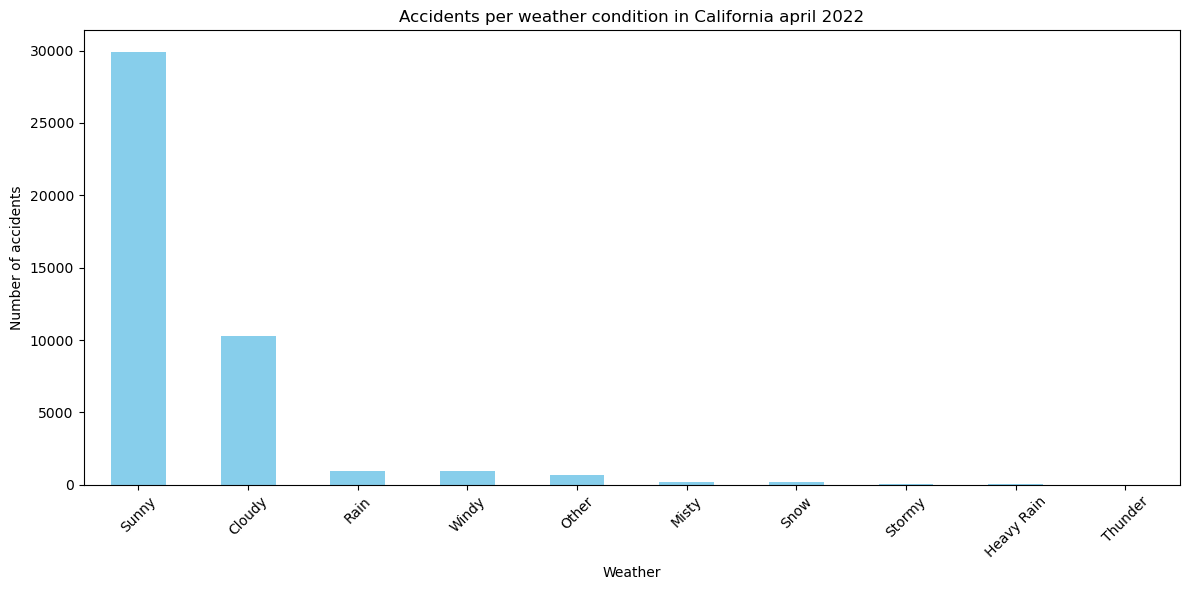

In [41]:
plt.figure(figsize=(12, 6))
weather_ap.plot(kind='bar', color='skyblue')
plt.title('Accidents per weather condition in California april 2022')
plt.xlabel('Weather')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [42]:
df_weather_california_2022_okt = df_weather_california_2022[df_weather_california_2022['Month'] == 10]
weather_okt = df_weather_california_2022_okt['Weather_Condition_Useful'].value_counts()

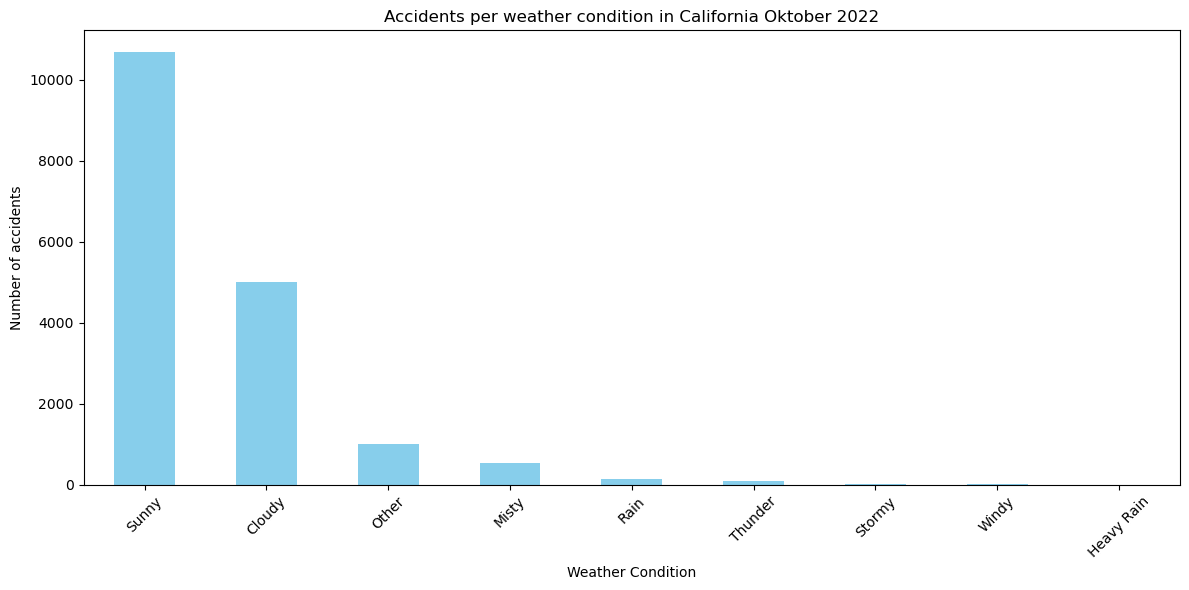

In [43]:
plt.figure(figsize=(12, 6))
weather_okt.plot(kind='bar', color='skyblue')
plt.title('Accidents per weather condition in California Oktober 2022')
plt.xlabel('Weather Condition')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Plan:
verder gaan met de zipcodes?
Kijken naar staten waar het weer extremer is, zoals Florida



In [ ]:
df_weather_NY = df_weather[df_weather['City'] == 'New York']

In [ ]:
df_weather_NY_2022 = df_weather_NY[df_weather_NY['Year'] == 2022]

In [ ]:
#df['Month'] = 
acdnts_per_month = df_weather_NY_2022['Month'].value_counts().sort_index()

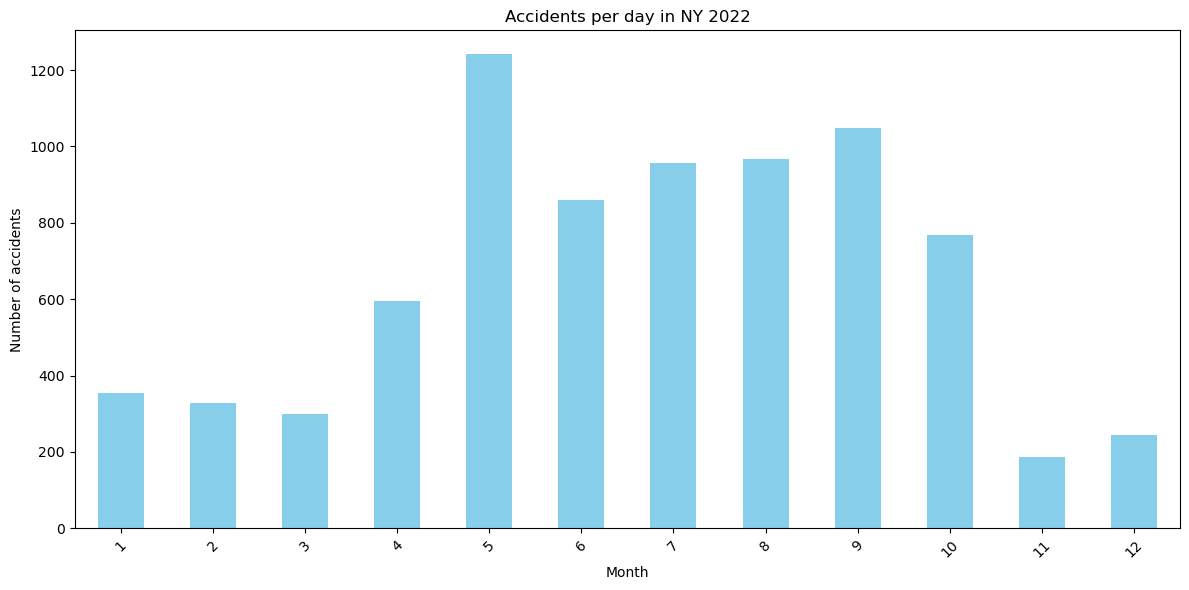

In [ ]:
plt.figure(figsize=(12, 6))
acdnts_per_month.plot(kind='bar', color='skyblue')
plt.title('Accidents per month in NY 2022')
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
df_weather_NY_2022_may = df_weather_NY_2022[df_weather_NY_2022['Month'] == 5]
weather_may = df_weather_NY_2022_may['Weather_Condition_Useful'].value_counts()

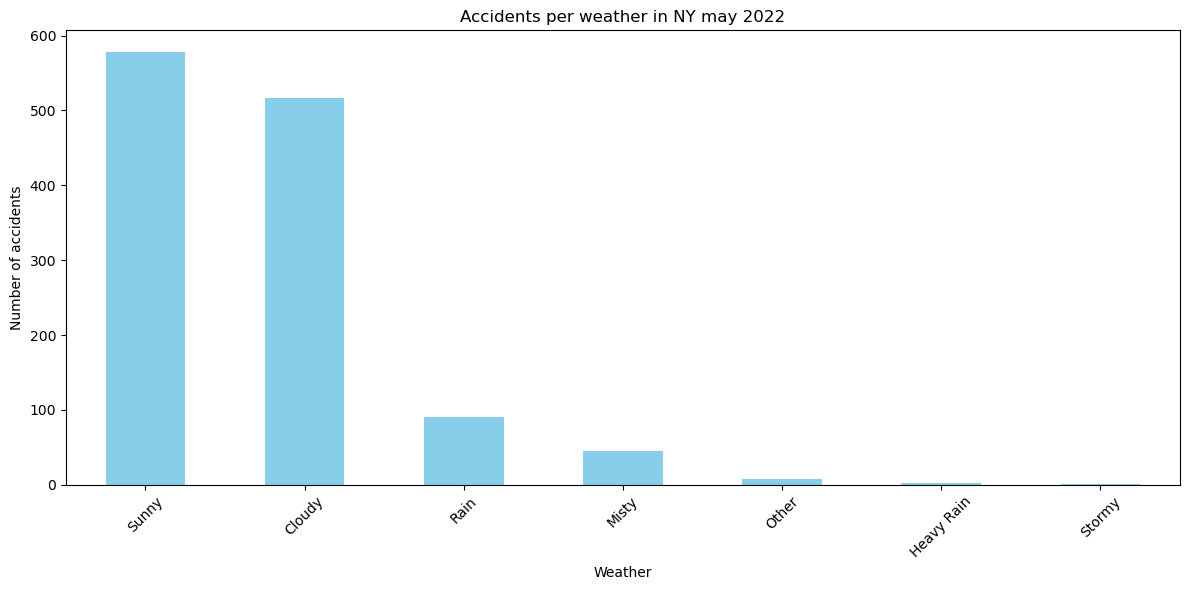

In [ ]:
plt.figure(figsize=(12, 6))
weather_may.plot(kind='bar', color='skyblue')
plt.title('Accidents per weather in NY may 2022')
plt.xlabel('Weather')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
df_weather_NY_2022_nov = df_weather_NY_2022[df_weather_NY_2022['Month'] == 11]
weather_nov = df_weather_NY_2022_nov['Weather_Condition_Useful'].value_counts()

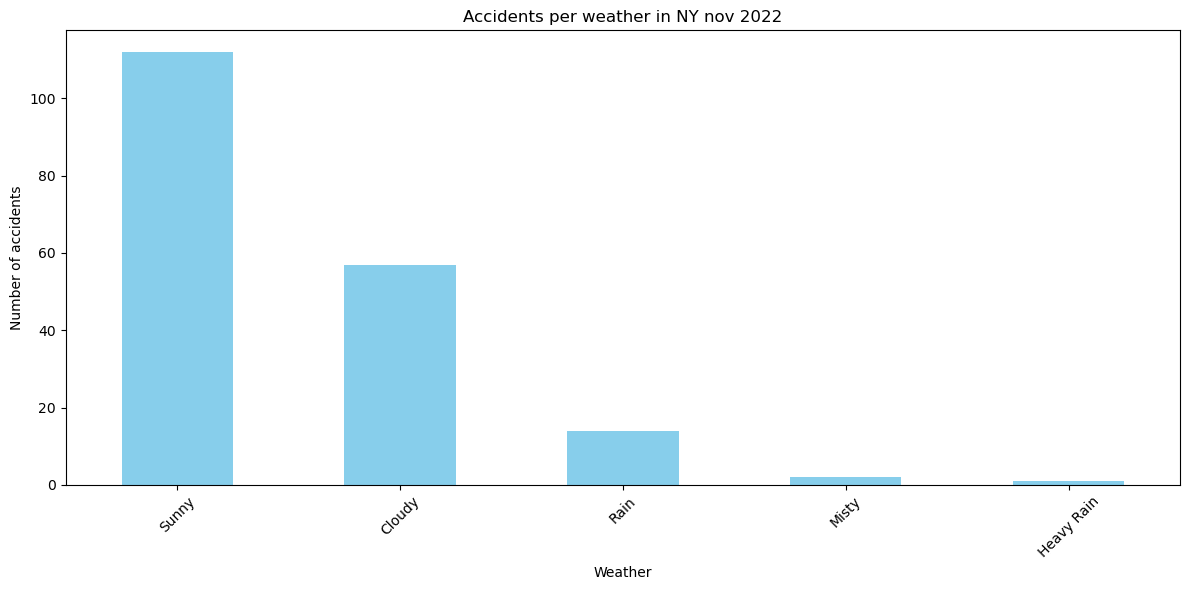

In [ ]:
plt.figure(figsize=(12, 6))
weather_nov.plot(kind='bar', color='skyblue')
plt.title('Accidents per weather in NY nov 2022')
plt.xlabel('Weather')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
acdnts_per_zip = df_weather_california_2022['Zipcode'].value_counts().sort_index()
acdnts_per_zip

89402           3
89439           6
90001         112
90001-1010      1
90001-1019      1
             ... 
96161-4204      3
96161-4257      1
96161-4273      2
96161-4515      2
96162           2
Name: Zipcode, Length: 58001, dtype: int64

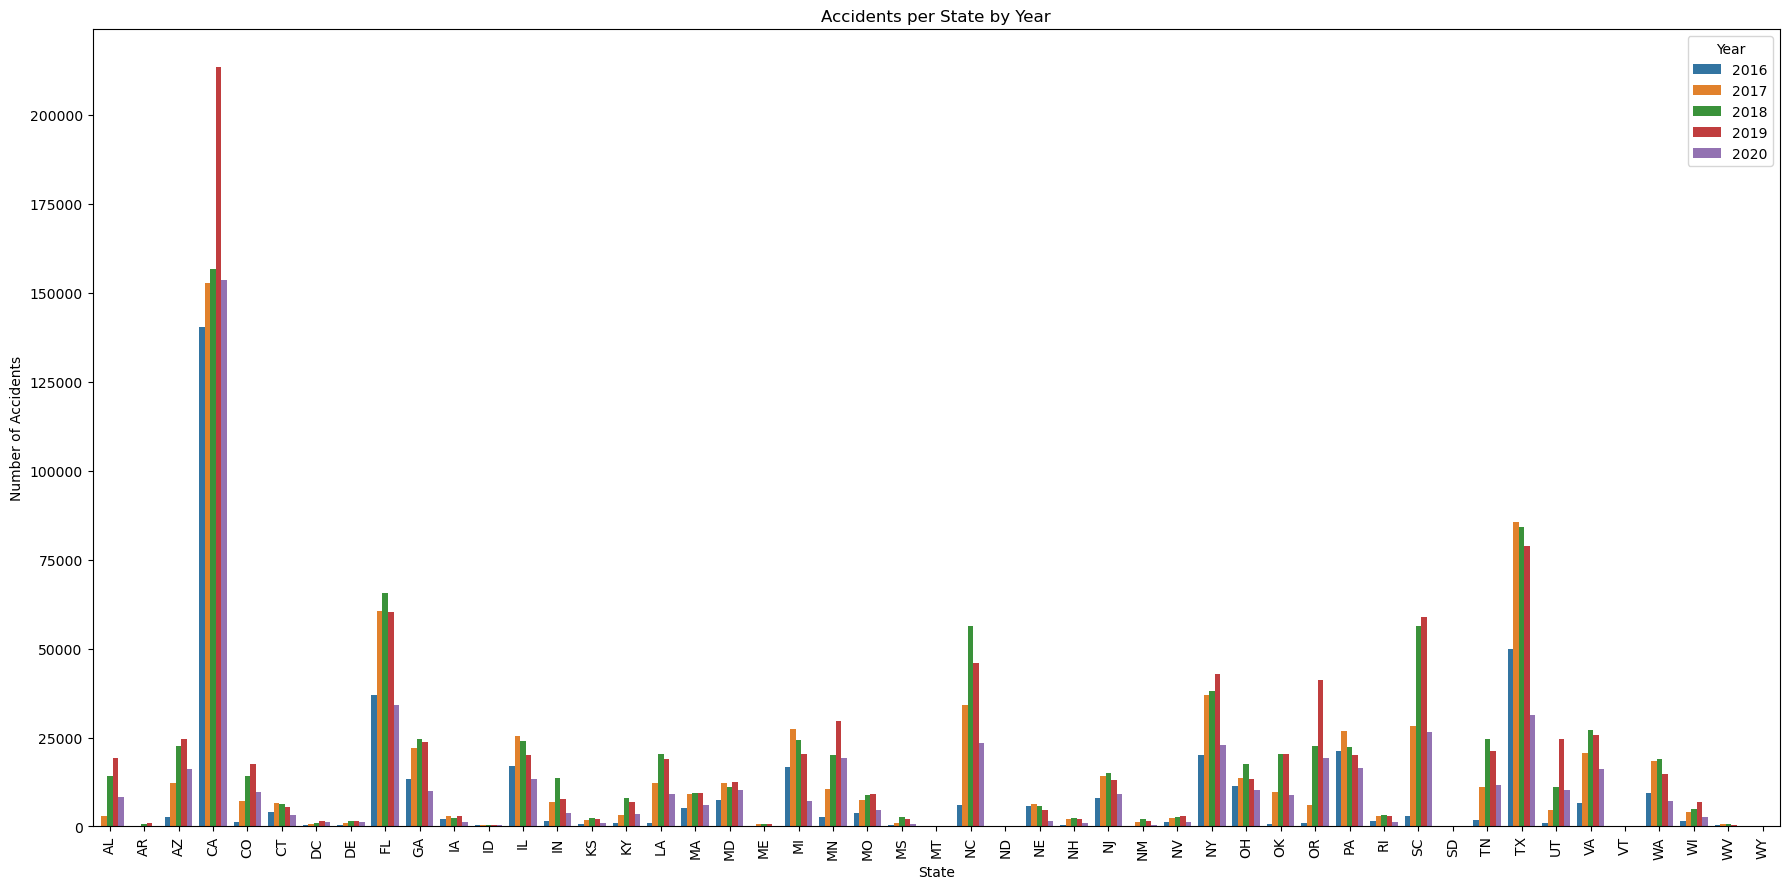

In [ ]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

Isabel:

In [ ]:
#leuk coderen

Sophia met weer enzo:

In [ ]:
#leuker coderen